In [93]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import thinkstats2
import thinkplot
from scipy.stats import skew, kurtosis 
import statistics
import statsmodels.formula.api as smf

In [2]:
# Read in excel file
df = pd.read_excel("pollution_CO_2000_2010.xlsx")
df

,Unnamed: 0,State,Date Local,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
0,40036,Colorado,2003-01-01,37,30,1.0,NaN
1,40037,Colorado,2003-01-01,37,30,1.0,7.0
2,40038,Colorado,2003-01-01,37,30,NaN,NaN
3,40039,Colorado,2003-01-01,37,30,NaN,7.0
4,40040,Colorado,2003-01-02,56,15,55.0,NaN
...,...,...,...,...,...,...,...
13576,45141,Colorado,2010-12-30,33,30,NaN,7.0
13577,45142,Colorado,2010-12-31,42,30,6.0,NaN
13578,45143,Colorado,2010-12-31,42,30,6.0,2.0
13579,45144,Colorado,2010-12-31,42,30,NaN,NaN


In [3]:
# Now I will create a new column that will list the highest IAQI score of the day, since overall AQI is determined 
# by taking the highest value.

def getMax(x):
    return max(x['NO2 AQI'], x['O3 AQI'], x['SO2 AQI'], x['CO AQI'])

df['Max AQI'] = df.apply(getMax, axis=1)
df

,Unnamed: 0,State,Date Local,NO2 AQI,O3 AQI,SO2 AQI,CO AQI,Max AQI
0,40036,Colorado,2003-01-01,37,30,1.0,NaN,37.0
1,40037,Colorado,2003-01-01,37,30,1.0,7.0,37.0
2,40038,Colorado,2003-01-01,37,30,NaN,NaN,37.0
3,40039,Colorado,2003-01-01,37,30,NaN,7.0,37.0
4,40040,Colorado,2003-01-02,56,15,55.0,NaN,56.0
...,...,...,...,...,...,...,...,...
13576,45141,Colorado,2010-12-30,33,30,NaN,7.0,33.0
13577,45142,Colorado,2010-12-31,42,30,6.0,NaN,42.0
13578,45143,Colorado,2010-12-31,42,30,6.0,2.0,42.0
13579,45144,Colorado,2010-12-31,42,30,NaN,NaN,42.0


In [4]:
# Remove rows with Nans, as they are incomplete duplicates anyways
df_clean = df.dropna()

***Exploratory scatterplots and histograms***

<function matplotlib.pyplot.show(*args, **kw)>

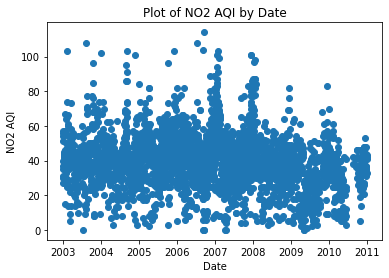

In [5]:
# Look at the scatterplot for NO2 by date
plt.scatter(df_clean['Date Local'], df_clean['NO2 AQI'])
plt.title("Plot of NO2 AQI by Date")
plt.xlabel("Date")
plt.ylabel("NO2 AQI")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

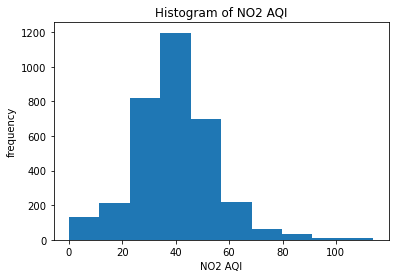

In [6]:
# Look at the histogram for NO2
plt.hist(df_clean['NO2 AQI'])
plt.title("Histogram of NO2 AQI")
plt.xlabel("NO2 AQI")
plt.ylabel("frequency")
plt.show

In [7]:
# Look at the stats for NO2
df_clean['NO2 AQI'].describe()

count    3397.000000
mean       39.629673
std        14.968303
min         0.000000
25%        31.000000
50%        40.000000
75%        48.000000
max       114.000000
Name: NO2 AQI, dtype: float64

In [8]:
# Calculate the spread and tails of NO2
print("Variance: {}".format(df_clean['NO2 AQI'].var()))
print("Skew: {}".format(skew(df_clean['NO2 AQI'])))
print("Kurtosis: {}".format(kurtosis(df_clean['NO2 AQI'])))
print("Mode: {}".format(statistics.mode(df_clean['NO2 AQI'])))

Variance: 224.05009686021685
Skew: 0.46077000971629645
Kurtosis: 1.80049724065241
Mode: 42


<function matplotlib.pyplot.show(*args, **kw)>

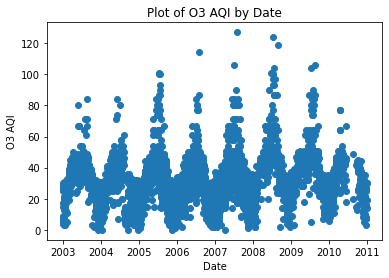

In [9]:
# Look at the scatterplot for O3 by date
plt.scatter(df_clean['Date Local'], df_clean['O3 AQI'])
plt.title("Plot of O3 AQI by Date")
plt.xlabel("Date")
plt.ylabel("O3 AQI")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

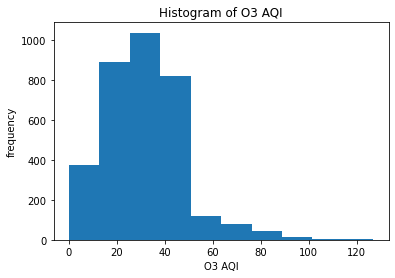

In [10]:
# Look at the histogram for O3
plt.hist(df_clean['O3 AQI'])
plt.title("Histogram of O3 AQI")
plt.xlabel("O3 AQI")
plt.ylabel("frequency")
plt.show

In [11]:
# Look at the stats for O3
df_clean['O3 AQI'].describe()

count    3397.000000
mean       31.864586
std        16.393926
min         0.000000
25%        20.000000
50%        31.000000
75%        42.000000
max       127.000000
Name: O3 AQI, dtype: float64

In [12]:
# Calculate the spread and tails of O3
print("Variance: {}".format(df_clean['O3 AQI'].var()))
print("Skew: {}".format(skew(df_clean['O3 AQI'])))
print("Kurtosis: {}".format(kurtosis(df_clean['O3 AQI'])))
print("Mode: {}".format(statistics.mode(df_clean['O3 AQI'])))

Variance: 268.760809700792
Skew: 0.9005657510959432
Kurtosis: 2.2580848768631956
Mode: 25


<function matplotlib.pyplot.show(*args, **kw)>

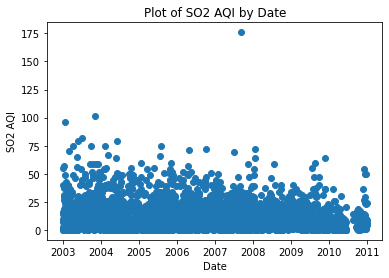

In [13]:
# Look at the scatterplot for SO2 by date
plt.scatter(df_clean['Date Local'], df_clean['SO2 AQI'])
plt.title("Plot of SO2 AQI by Date")
plt.xlabel("Date")
plt.ylabel("SO2 AQI")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

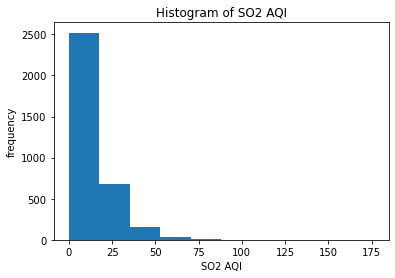

In [14]:
# Look at the histogram for SO2
plt.hist(df_clean['SO2 AQI'])
plt.title("Histogram of SO2 AQI")
plt.xlabel("SO2 AQI")
plt.ylabel("frequency")
plt.show

In [15]:
# Look at the stats for SO2
df_clean['SO2 AQI'].describe()

count    3397.000000
mean       13.038269
std        12.538715
min         0.000000
25%         4.000000
50%        10.000000
75%        19.000000
max       176.000000
Name: SO2 AQI, dtype: float64

In [16]:
# Calculate the spread and tails of SO2
print("Variance: {}".format(df_clean['SO2 AQI'].var()))
print("Skew: {}".format(skew(df_clean['SO2 AQI'])))
print("Kurtosis: {}".format(kurtosis(df_clean['SO2 AQI'])))

Variance: 157.2193831042649
Skew: 2.3071727001255344
Kurtosis: 12.43084722616301


<function matplotlib.pyplot.show(*args, **kw)>

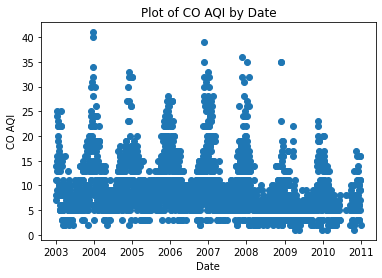

In [17]:
# Look at the scatterplot for CO by date
plt.scatter(df_clean['Date Local'], df_clean['CO AQI'])
plt.title("Plot of CO AQI by Date")
plt.xlabel("Date")
plt.ylabel("CO AQI")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

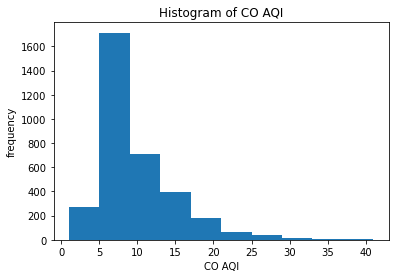

In [18]:
# Look at the histogram for CO
plt.hist(df_clean['CO AQI'])
plt.title("Histogram of CO AQI")
plt.xlabel("CO AQI")
plt.ylabel("frequency")
plt.show

In [19]:
# Look at the stats for CO
df_clean['CO AQI'].describe()

count    3397.000000
mean        9.161024
std         5.172607
min         1.000000
25%         6.000000
50%         8.000000
75%        11.000000
max        41.000000
Name: CO AQI, dtype: float64

In [20]:
# Calculate the spread and tails of CO
print("Variance: {}".format(df_clean['CO AQI'].var()))
print("Skew: {}".format(skew(df_clean['CO AQI'])))
print("Kurtosis: {}".format(kurtosis(df_clean['CO AQI'])))
print("Mode: {}".format(statistics.mode(df_clean['CO AQI'])))

Variance: 26.755865616893757
Skew: 1.7683551028770654
Kurtosis: 4.358640482100684
Mode: 6.0


<function matplotlib.pyplot.show(*args, **kw)>

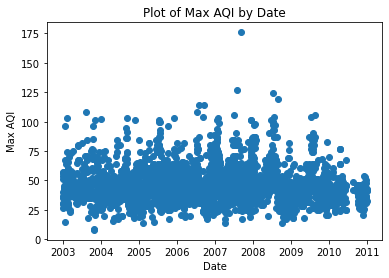

In [21]:
# Look at the scatterplot for Max AQI by date
plt.scatter(df_clean['Date Local'], df_clean['Max AQI'])
plt.title("Plot of Max AQI by Date")
plt.xlabel("Date")
plt.ylabel("Max AQI")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

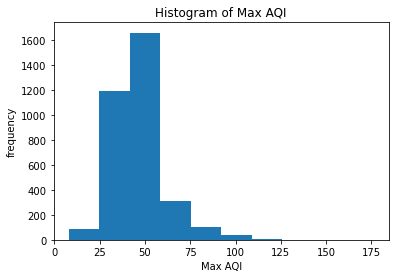

In [22]:
# Look at the histogram for Max AQI
plt.hist(df_clean['Max AQI'])
plt.title("Histogram of Max AQI")
plt.xlabel("Max AQI")
plt.ylabel("frequency")
plt.show

In [23]:
# Look at the stats for CO
df_clean['Max AQI'].describe()

count    3397.000000
mean       46.102149
std        14.023953
min         8.000000
25%        38.000000
50%        44.000000
75%        51.000000
max       176.000000
Name: Max AQI, dtype: float64

In [24]:
# Calculate the spread and tails of CO
print("Variance: {}".format(df_clean['Max AQI'].var()))
print("Skew: {}".format(skew(df_clean['Max AQI'])))
print("Kurtosis: {}".format(kurtosis(df_clean['Max AQI'])))

Variance: 196.6712468529579
Skew: 1.4770982586715982
Kurtosis: 5.17625756675746


***Remove Outlier from Dataset and recalculate SO2 and Max AQI statistics***

In [25]:
df_new = pd.read_excel("pollution_CO_2000_2010.xlsx")
df_new = df_new[(df_new['SO2 AQI']<170)]
df_new['Max AQI'] = df_new.apply(getMax, axis=1)

In [26]:
# Drop NAN values
df_new.dropna()

,Unnamed: 0,State,Date Local,NO2 AQI,O3 AQI,SO2 AQI,CO AQI,Max AQI
1,40037,Colorado,2003-01-01,37,30,1.0,7.0,37.0
5,40041,Colorado,2003-01-02,56,15,55.0,11.0,56.0
9,40045,Colorado,2003-01-03,57,28,40.0,14.0,57.0
13,40049,Colorado,2003-01-04,30,17,0.0,8.0,30.0
17,40053,Colorado,2003-01-05,35,25,14.0,11.0,35.0
...,...,...,...,...,...,...,...,...
13562,45127,Colorado,2010-12-27,34,26,4.0,11.0,34.0
13566,45131,Colorado,2010-12-28,43,14,24.0,16.0,43.0
13570,45135,Colorado,2010-12-29,41,19,9.0,16.0,41.0
13574,45139,Colorado,2010-12-30,33,30,4.0,7.0,33.0


<function matplotlib.pyplot.show(*args, **kw)>

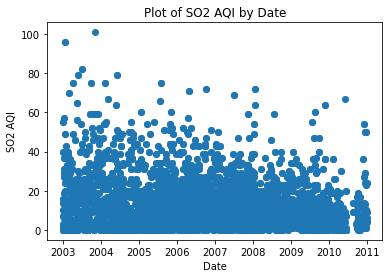

In [27]:
# Look at the scatterplot for SO2 by date
plt.scatter(df_new['Date Local'], df_new['SO2 AQI'])
plt.title("Plot of SO2 AQI by Date")
plt.xlabel("Date")
plt.ylabel("SO2 AQI")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

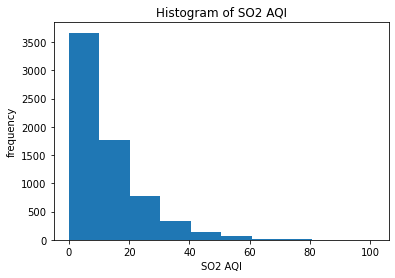

In [28]:
# We can see the outlier was removed
# Look at the histogram for SO2
plt.hist(df_new['SO2 AQI'])
plt.title("Histogram of SO2 AQI")
plt.xlabel("SO2 AQI")
plt.ylabel("frequency")
plt.show

In [29]:
# Look at the stats for SO2
df_new['SO2 AQI'].describe()

count    6790.000000
mean       12.986156
std        12.195302
min         0.000000
25%         4.000000
50%        10.000000
75%        19.000000
max       101.000000
Name: SO2 AQI, dtype: float64

In [30]:
# Calculate the spread and tails of SO2
print("Variance: {}".format(df_new['SO2 AQI'].var()))
print("Skew: {}".format(skew(df_new['SO2 AQI'])))
print("Kurtosis: {}".format(kurtosis(df_new['SO2 AQI'])))
print("Mode: {}".format(statistics.mode(df_clean['SO2 AQI'])))

Variance: 148.72539382449506
Skew: 1.7760064050008835
Kurtosis: 4.542475217057452
Mode: 0.0


<function matplotlib.pyplot.show(*args, **kw)>

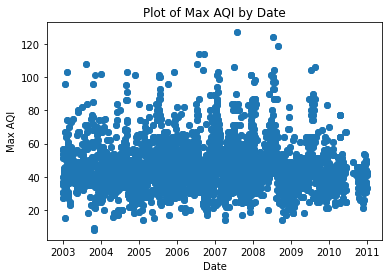

In [31]:
# Look at the scatterplot for Max AQI by date
plt.scatter(df_new['Date Local'], df_new['Max AQI'])
plt.title("Plot of Max AQI by Date")
plt.xlabel("Date")
plt.ylabel("Max AQI")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

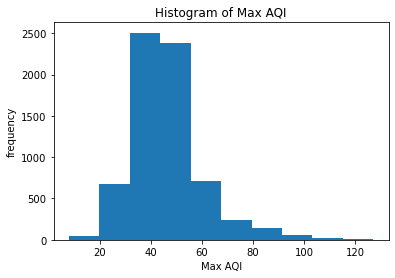

In [32]:
# Look at the histogram for Max AQI
plt.hist(df_new['Max AQI'])
plt.title("Histogram of Max AQI")
plt.xlabel("Max AQI")
plt.ylabel("frequency")
plt.show

In [33]:
# Look at the stats for MAX AQI
df_new['Max AQI'].describe()

count    6790.000000
mean       46.061561
std        13.833907
min         8.000000
25%        38.000000
50%        44.000000
75%        51.000000
max       127.000000
Name: Max AQI, dtype: float64

In [34]:
# Calculate the spread and tails of MAX AQI
print("Variance: {}".format(df_new['Max AQI'].var()))
print("Skew: {}".format(skew(df_new['Max AQI'])))
print("Kurtosis: {}".format(kurtosis(df_new['Max AQI'])))
print("Mode: {}".format(statistics.mode(df_clean['Max AQI'])))

Variance: 191.37697266933955
Skew: 1.2957191742964311
Kurtosis: 3.3262474626492677
Mode: 42.0


***PMF***

In [36]:
# Created a dataframe that had time set as the index
time_df = df_new.set_index('Date Local')
time_df.head()

,Unnamed: 0,State,NO2 AQI,O3 AQI,SO2 AQI,CO AQI,Max AQI
Date Local,,,,,,,
2003-01-01,40036,Colorado,37,30,1.0,NaN,37.0
2003-01-01,40037,Colorado,37,30,1.0,7.0,37.0
2003-01-02,40040,Colorado,56,15,55.0,NaN,56.0
2003-01-02,40041,Colorado,56,15,55.0,11.0,56.0
2003-01-03,40044,Colorado,57,28,40.0,NaN,57.0


In [37]:
# Drop nans from df
time_df.dropna(inplace=True)

In [38]:
# Separate out the data into two groups by first year and last year of study
year_2003 = time_df[(time_df.index.year == 2003)]
year_2010 = time_df[(time_df.index.year == 2010)]

In [39]:
# The number of observations for the sets is different, leaving all the more reason to normalize the data with pmf.
# Now i will make the pmfs to plot
pmf_2003 = thinkstats2.Pmf(year_2003['Max AQI'], label='2003')
pmf_2010 = thinkstats2.Pmf(year_2010['Max AQI'], label='2010')

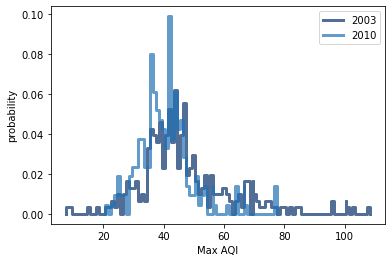

<Figure size 576x432 with 0 Axes>

In [40]:
# Plot the pmfs on the same visualization
thinkplot.Pmfs([pmf_2003, pmf_2010])
thinkplot.Show(xlabel='Max AQI', ylabel='probability')

***CDF***

In [41]:
# Because of the large number of observations, the pmf had limited usefullness. I decided to take those same data sets 
# and use them to compare the cdfs.
cdf_2003 = thinkstats2.Cdf(year_2003['Max AQI'], label='2003')
cdf_2010 = thinkstats2.Cdf(year_2010['Max AQI'], label='2010')

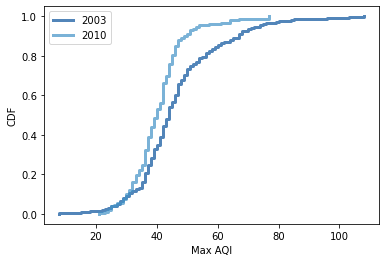

<Figure size 576x432 with 0 Axes>

In [42]:
# Plot cdfs for comparison
thinkplot.PrePlot(2)
thinkplot.Cdfs([cdf_2003, cdf_2010])
thinkplot.Show(xlabel='Max AQI', ylabel='CDF')

***Analytical Distribution***

In [43]:
# I decide to check the normal distribution model against the Max AQI data 
# Pull out the variable for Max AQI 
maxAQI = df_new['Max AQI']

In [44]:
# Use function from book to estimate parameters: trim outliers to yields a better fit
mu, var = thinkstats2.TrimmedMeanVar(maxAQI, p=0.01)
print('Mean, Var', mu, var)

Mean, Var 45.76577524038461 152.05135871390644


Sigma 12.330910700913638


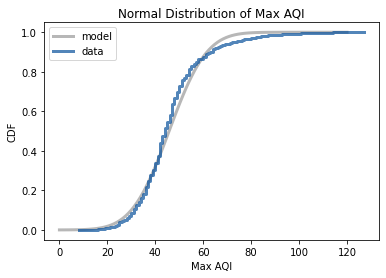

In [45]:
# plot normal distribution model and the data
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=120)

thinkplot.Plot(xs, ps, label='model', color='0.6')

# plot the data
cdf = thinkstats2.Cdf(maxAQI, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='Normal Distribution of Max AQI',
                 xlabel='Max AQI',
                 ylabel='CDF')

In [46]:
# Copied over function from the book
def MakeNormalModel(weights):

    cdf = thinkstats2.Cdf(weights, label='data')

    mean, var = thinkstats2.TrimmedMeanVar(weights)
    std = np.sqrt(var)
    print('n, mean, std', len(weights), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

n, mean, std 6790 1.645570489116407 0.11372949591810379


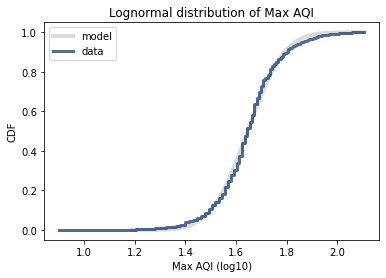

In [47]:
# Plot lognormal distribution
log_maxAQI = np.log10(maxAQI)
MakeNormalModel(log_maxAQI)
thinkplot.Config(title='Lognormal distribution of Max AQI', xlabel='Max AQI (log10)',
                 ylabel='CDF', loc='upper left')

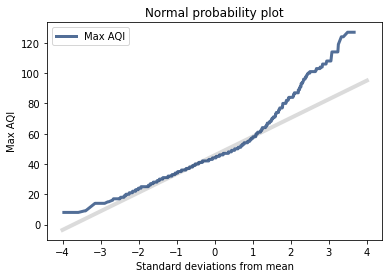

In [48]:
# Plot a normal probability plot of Max AQ1
mean, var = thinkstats2.TrimmedMeanVar(maxAQI, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = thinkstats2.NormalProbability(maxAQI)
thinkplot.Plot(xs, ys, label='Max AQI')

thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Max AQI')

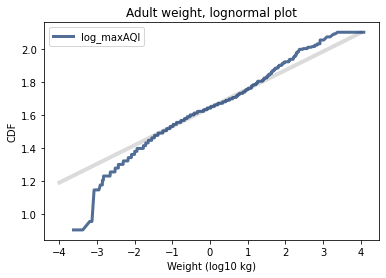

In [49]:
log_maxAQI = np.log10(maxAQI)

mean, var = thinkstats2.TrimmedMeanVar(log_maxAQI, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = thinkstats2.NormalProbability(log_maxAQI)
thinkplot.Plot(xs, ys, label='log_maxAQI')

thinkplot.Config(title='Max AQI, lognormal plot',
                 xlabel='Max AQI (log10)',
                 ylabel='CDF')


thinkplot.Config(title='Adult weight, lognormal plot', xlabel='Weight (log10 kg)',
                 ylabel='CDF', loc='upper left')

***Scatterplots***

In [50]:
# To get an idea of where to start with the scatterplots, I want to take a look at the correlation matrix
df_new.corr()

,Unnamed: 0,NO2 AQI,O3 AQI,SO2 AQI,CO AQI,Max AQI
Unnamed: 0,1.000000,-0.043433,0.084453,-0.112137,-0.127784,0.039623
NO2 AQI,-0.043433,1.000000,-0.252925,0.354719,0.571022,0.656955
O3 AQI,0.084453,-0.252925,1.000000,-0.087523,-0.510848,0.325294
SO2 AQI,-0.112137,0.354719,-0.087523,1.000000,0.302459,0.313794
CO AQI,-0.127784,0.571022,-0.510848,0.302459,1.000000,0.311026
Max AQI,0.039623,0.656955,0.325294,0.313794,0.311026,1.000000


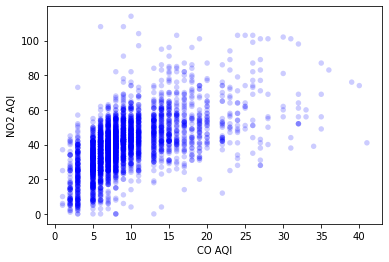

<Figure size 576x432 with 0 Axes>

In [51]:
# Since NO2 and CO have a correlation score of .57, I want to make a scatterplot of them
thinkplot.Scatter(df_new['CO AQI'], df_new['NO2 AQI'])
thinkplot.Show(xlabel='CO AQI', ylabel='NO2 AQI')

In [52]:
# Let's add some jitter
co = thinkstats2.Jitter(df_new['CO AQI'], 0.5)
no2 = thinkstats2.Jitter(df_new['NO2 AQI'], 0.5)

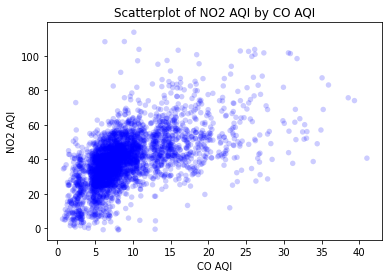

<Figure size 576x432 with 0 Axes>

In [53]:
# Replot the variables with jitter and alpha to better see the data
thinkplot.Scatter(co, no2, alpha=0.2)
thinkplot.Show(xlabel='CO AQI', ylabel='NO2 AQI', title='Scatterplot of NO2 AQI by CO AQI')

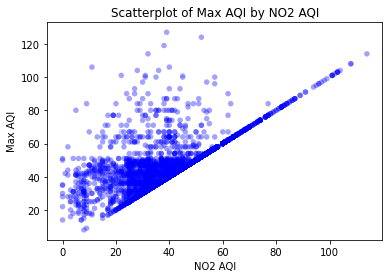

<Figure size 576x432 with 0 Axes>

In [54]:
# For my second scatterplot, I chose Max AQI and NO2, since they had a correlation score of .66
thinkplot.Scatter(df_new['NO2 AQI'], df_new['Max AQI'])
thinkplot.Show(xlabel='NO2 AQI', ylabel='Max AQI', title='Scatterplot of Max AQI by NO2 AQI')

In [55]:
# Use the covariance function provided in thinkstats2 to determine covariance between the variables
cleaned = df_new.dropna(subset=['CO AQI', 'NO2 AQI'])
cos, no2s = cleaned['CO AQI'], cleaned['NO2 AQI']
thinkstats2.Cov(cos, no2s)

44.20771501080049

In [56]:
# Do the same to calculate the covariance for NO2 and Max AQI
cleaned2 = df_new.dropna(subset=['NO2 AQI', 'Max AQI'])
nos, maxs = cleaned['NO2 AQI'], cleaned['Max AQI']
thinkstats2.Cov(nos, maxs)

136.1239951283364

In [57]:
# Calculate Spearman's rank correlation
thinkstats2.SpearmanCorr(cos, no2s)

0.6144604473015244

In [58]:
# Calculate Spearman's rank correlation
thinkstats2.SpearmanCorr(nos, maxs)

0.6875409925803798

***Hypothesis Test***

In [59]:
# Test statistic will be a difference in means of Max AQI between 2003 and 2010. This will be a two-tailed test. 
# I will use the functions provided from the book. I already have a year_2003 df and a year_2010 df, but I 
# will to create a df that contains both pieces of information without the other years. 
test_df = pd.concat([year_2003, year_2010])
data = year_2003['Max AQI'].values, year_2010['Max AQI'].values

In [60]:
# Call the DiffMeansPermute class, which in turn calls the HypothesisTest, TestStatistic, and MakeModel functions.
ht = thinkstats2.DiffMeansPermute(data)
pvalue = ht.PValue()

AttributeError: module 'thinkstats2' has no attribute 'DiffMeansPermute'

In [61]:
# Okay, guess I'll copy those over from the book and try again. 

class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [62]:
# Trying again
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.0

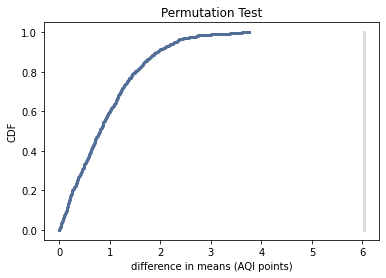

<Figure size 576x432 with 0 Axes>

In [67]:
# Plot the CDF distribution of the test statistic
ht.PlotCdf()
thinkplot.Show(xlabel='difference in means (AQI points)', ylabel='CDF', title='Permutation Test')

In [66]:
year_2003['Max AQI'].mean() - year_2010['Max AQI'].mean()

6.025750077327558

***Regression Test***

In [83]:
# Just making sure I have clean data to run regression testing
reg_test = df_new.dropna(subset=['Date Local', 'Max AQI'])
reg_test = reg_test.set_index('Date Local', drop=False)
reg_test.index.to_pydatetime()
dates = reg_test.index
aqis = reg_test['Max AQI']

In [84]:
# Use the LeastSquares function from the book to run linear least squares fit 
inter, slope = thinkstats2.LeastSquares(dates, aqis)
fit_xs, fit_ys = thinkstats2.FitLine(dates, inter, slope)

UFuncTypeError: ufunc 'add' cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')

In [147]:
# Ok, I'm using time series data in my regression test and I need to take a different approach. 
regress = df_new.dropna(subset=['Date Local', 'Max AQI', 'CO AQI'])

In [156]:
regress = regress.set_index('Date Local', drop=False)
regress['date'] = regress.index
start = regress.date[0]
one_year = np.timedelta64(1, 'Y')
regress['Years'] = (regress.date - start) / one_year

In [157]:
# Create a years variable that I can use for regression 
regress['Years'] = ((regress['Date Local'] - regress['Date Local'][0]) / np.timedelta64(1, 'Y'))

In [158]:
# Run regression model
model = smf.ols('regress['Max AQI'] ~ regress['Date Local']')
results = model.fit()

SyntaxError: invalid syntax (<ipython-input-158-a66d03af2305>, line 2)

In [159]:
# Because of the space in the column names, I can't figure out how to run the above, so I'm just going to change the names
regress = regress.rename(columns = {'Max AQI': 'maxAQI', 'Date Local': 'date'})

In [161]:
model = smf.ols('maxAQI ~ Years', data=regress)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 maxAQI   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.783
Date:                Sat, 21 Nov 2020   Prob (F-statistic):             0.0162
Time:                        16:48:46   Log-Likelihood:                -13740.
No. Observations:                3396   AIC:                         2.748e+04
Df Residuals:                    3394   BIC:                         2.750e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.1951      0.527     89.563      0.000      46.162      48.228
Years         -0.2948      0.123     -2.405      0.016      -0.535      -0.054
==============================================================================
Omnibus:                      861.463   Durbin-Watson:                   1.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2567.223
Skew:                           1.301   Prob(JB):                         0.00
Kurtosis:                       6.373   Cond. No.                         9.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
# Copy over plotting functions from the book and tweek them

def PlotFittedValues(model, results, label=''):
    years = model.exog[:,1]
    values = model.endog
    thinkplot.Scatter(years, values, s=15, label=label)
    thinkplot.Plot(years, results.fittedvalues, label='model', color='#ff7f00')
    
def PlotLinearModel(regress, name):
    model, results = RunLinearModel(regress)
    PlotFittedValues(model, results, label=name)
    thinkplot.Config(title='Fitted values',
                     xlabel='Years',
                     ylabel='Max AQI')

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x00000142045E8670>>

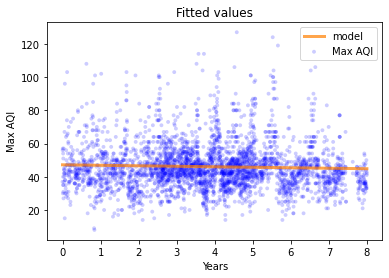

In [162]:
name = 'Max AQI'
PlotLinearModel(regress, name)

In [187]:
# Work on rolling mean. Account for missing dates by reindexing
dat = pd.date_range(regress2.index.min(), regress2.index.max())
reindexed = regress2.reindex()

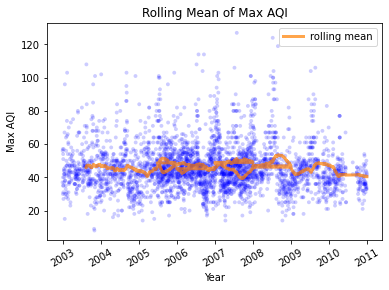

In [186]:
# Plot roll mean
thinkplot.Scatter(regress2.maxAQI, s=15, alpha=0.2)
roll_mean = regress2.maxAQI.rolling(180).mean()
thinkplot.Plot(roll_mean, label='rolling mean', color='#ff7f00')
plt.xticks(rotation=30)
thinkplot.Config(ylabel='Max AQI', xlabel='Year', title='Rolling Mean of Max AQI')

In [179]:
regress2 = regress.drop(columns=['date'])

In [184]:
regress2

,Unnamed: 0,State,NO2 AQI,O3 AQI,SO2 AQI,CO AQI,maxAQI,Years
Date Local,,,,,,,,
2003-01-01,40037,Colorado,37,30,1.0,7.0,37.0,0.000000
2003-01-02,40041,Colorado,56,15,55.0,11.0,56.0,0.002738
2003-01-03,40045,Colorado,57,28,40.0,14.0,57.0,0.005476
2003-01-04,40049,Colorado,30,17,0.0,8.0,30.0,0.008214
2003-01-05,40053,Colorado,35,25,14.0,11.0,35.0,0.010952
...,...,...,...,...,...,...,...,...
2010-12-27,45127,Colorado,34,26,4.0,11.0,34.0,7.986475
2010-12-28,45131,Colorado,43,14,24.0,16.0,43.0,7.989213
2010-12-29,45135,Colorado,41,19,9.0,16.0,41.0,7.991951
